In [1]:
import curvature
import manifold
import numpy as np
import matplotlib.pyplot as plt
import math

# Estimate curvature on a point cloud sampled from a sphere

Sample points

<IPython.core.display.Javascript object>


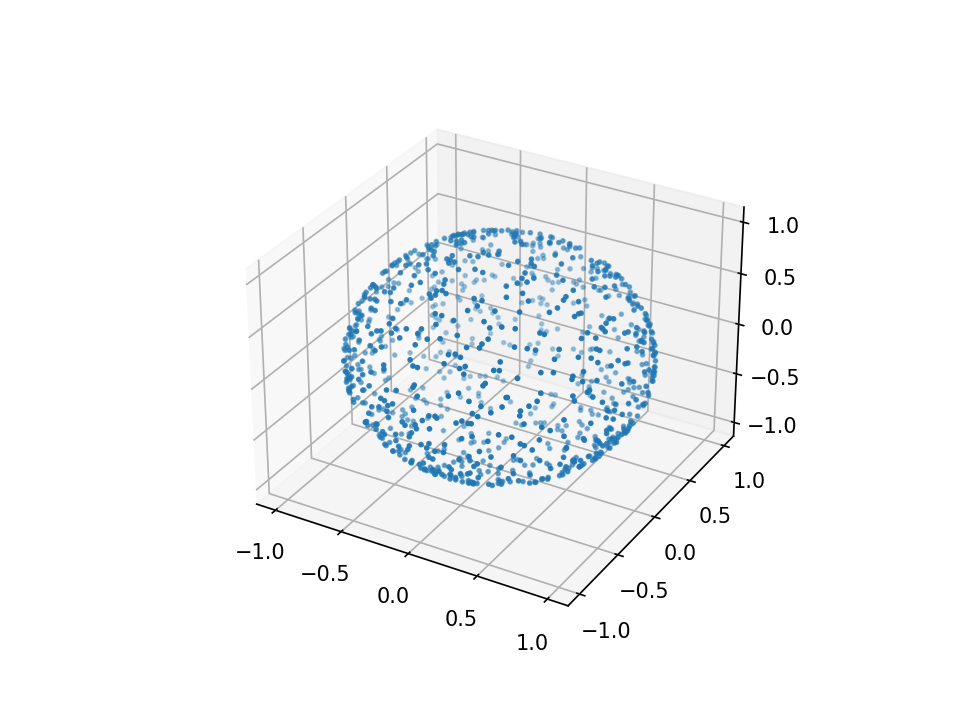

In [2]:
%matplotlib notebook

X = manifold.Sphere.sample(1000, 2) # sample 1000 points from a 2-sphere
np.save("example_data/X_1000.npy", X)

# plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
plt.show()

Estimate scalar curvature at every point. Note that this is a relatively small point cloud, and accuracy will increase with the number of points.

computed Rdist
computed density
computed nearest neighbor matrices


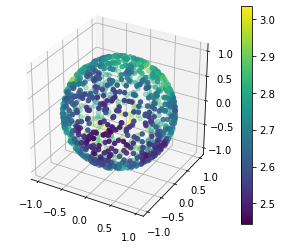

In [3]:
n = 2 # dimension of the manifold
sce = curvature.scalar_curvature_est(n, X) # create the estimator
Ss = sce.estimate(rmax = math.pi/2) # estimate at every point with rmax = pi/2 and otherwise default parameters

# Plot our curvature estimates
%matplotlib inline
manifold.plot_3d(X, Ss)

Alternatively, estimate curvature at just a subset of points---say only the points in the northern hemisphere

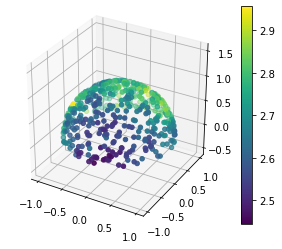

In [4]:
indices = [i for i, x in enumerate(X) if x[2] >=0 ] # indices of the points in the northern hemisphere
X_ = X[indices]
Ss_ = sce.estimate(rmax = math.pi/2, indices = indices) # reuse the same estimator that's already been initialized
manifold.plot_3d(X_, Ss_)

Optionally, you can take a closer look at what's happening by plotting the estimated ball ratios at a given point and plotting the fitted quadratic curve

Estimated coefficient C = -0.12168194347667065
Estimated scalar curvature S = 2.9203666434400954


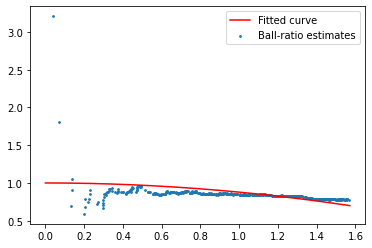

In [5]:
rmax = math.pi/2
n = 2
rs, ball_ratios = sce.ball_ratios(0, rmax = rmax) # reuse same estimator as above to calculate geodesic-ball ratio estimates centered at the 0th point
C = sce.fit_quad_coeff(0, rmax = rmax)
print("Estimated coefficient C =", C)
S = -6*(n + 2)*C # alternatively, this is equal to Ss[0] because we've already calculated curvature estimates at each point, but if you haven't already calculated curvature estimates, then you can use this formula
print("Estimated scalar curvature S =", S)

# plot
xs = np.linspace(0, rmax, 200)
ys = [1 + C*x**2 for x in xs]
plt.plot(xs, ys, color = 'r', label = "Fitted curve") # plot the quadratic curve 1 + C*r**2 in red
plt.scatter(rs, ball_ratios, s = 3, label = "Ball-ratio estimates") # plot all the estimated ball ratios in blue
plt.legend()
plt.show()


Same plot, but excluding the first 10 ball ratio estimates for easier visualization:


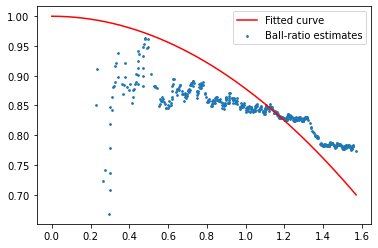

In [6]:
# Exclude the first 10 ball ratio estimates for easier visualization
print("\nSame plot, but excluding the first 10 ball ratio estimates for easier visualization:")
xs = np.linspace(0, rmax, 200)
ys = [1 + C*x**2 for x in xs]
plt.plot(xs, ys, color = 'r', label = "Fitted curve") # plot the quadratic curve 1 + C*r**2 in red
plt.scatter(rs[10:], ball_ratios[10:], s = 3, label = "Ball-ratio estimates") # plot all the estimated ball ratios in blue
plt.legend()
plt.show()

You can save the estimated geodesic-distance matrix, the density estimates, and the nearest-neighbor data (T matrix and nbr_matrix---see documentation for scalar_curvature_est class in curvature.py).

In [7]:
np.save("example_data/Rdist_1000.npy", sce.Rdist)
np.save("example_data/density_biweight_1000.npy", sce.density) # (we used a biweight kernel---the default---to estimate density)
np.save("example_data/T_1000.npy", sce.T)
np.save("example_data/nbr_matrix_1000.npy", sce.nbr_matrix)

# Estimate curvature from a distance matrix

Here, we use the exact geodesic distance matrix for a point cloud with 10,000 points (10x larger than above). We precomputed the exact distances using the manifold.Sphere.Rdist_array function. We also precomputed the density estimates (using a biweight kernel) and the neighbor matrices, but this isn't necessary. The resulting scalar curvature estimates are exactly what's shown in Figure 2B in the paper.

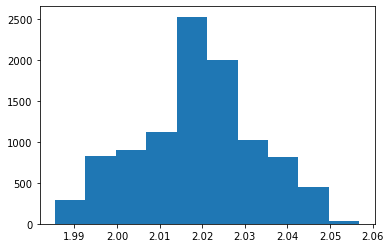

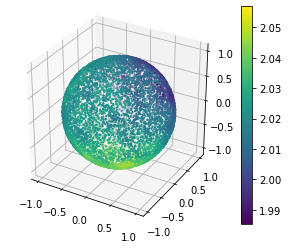

In [8]:
# load data
D = np.load("example_data/Rdist_10000.npy")
density = np.load("example_data/density_biweight_10000.npy")
T = np.load("example_data/T_10000.npy")
nbr_matrix = np.load("example_data/nbr_matrix_10000.npy")

# Initialize scalar curvature estimator
sce = curvature.scalar_curvature_est(2, density = density, Rdist = D, T = T, nbr_matrix = nbr_matrix)

# Estimate scalar curvature at all points
Ss = sce.estimate(rmax = math.pi/2)

# Plot histogram of estimates
plt.hist(Ss)
plt.show()

# Plot curvature estimates on sphere
X = np.load("example_data/X_10000.npy") # D is the geodesic-distance matrix for this point cloud
manifold.plot_3d(X, Ss, s = 1)

Optionally, you can take a closer look at what's happening by plotting the estimated ball ratios at a given point and plotting the fitted quadratic curve. Because this point cloud is much larger, the curve fits much better than it did in the section above ("Estimate curvature on a point cloud sampled from a sphere").

Estimated coefficient C = -0.08446320703367365
Estimated scalar curvature S = 2.0271169688081674


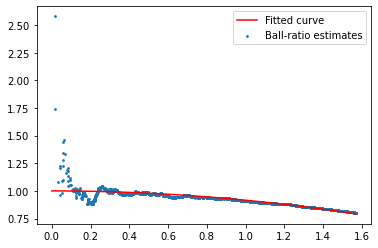


Same plot, but excluding the first 10 ball ratio estimates for easier visualization:


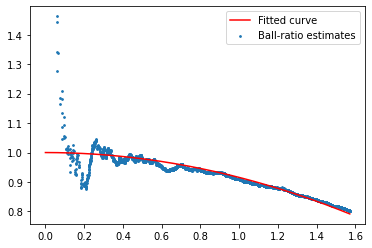

In [9]:
rmax = math.pi/2
n = 2
rs, ball_ratios = sce.ball_ratios(0, rmax = rmax) # reuse same estimator as above to calculate geodesic-ball ratio estimates centered at the 0th point
C = sce.fit_quad_coeff(0, rmax = rmax)
print("Estimated coefficient C =", C)
S = -6*(n + 2)*C # alternatively, this is equal to Ss[0] because above we calculated curvature estimates at each point, but if you haven't already calculated curvature estimates, then you can use this formula
print("Estimated scalar curvature S =", S)

# plot
xs = np.linspace(0, rmax, 200)
ys = [1 + C*x**2 for x in xs]
plt.plot(xs, ys, color = 'r', label = "Fitted curve") # plot the quadratic curve 1 + C*r**2 in red
plt.scatter(rs, ball_ratios, s = 3, label = "Ball-ratio estimates") # plot all the estimated ball ratios in blue
plt.legend()
plt.show()

# Exclude the first 10 ball ratio estimates for easier visualization
print("\nSame plot, but excluding the first 10 ball ratio estimates for easier visualization:")
xs = np.linspace(0, rmax, 200)
ys = [1 + C*x**2 for x in xs]
plt.plot(xs, ys, color = 'r', label = "Fitted curve") # plot the quadratic curve 1 + C*r**2 in red
plt.scatter(rs[10:], ball_ratios[10:], s = 3, label = "Ball-ratio estimates") # plot all the estimated ball ratios in blue
plt.legend()
plt.show()

# Estimate curvature for graph data

For graph data, precompute the distance matrix D, where D_{ij} is the (weighted) length of the shortest path between the ith and jth points. Estimate dimension n using a dimension-estimator that only requires a distance matrix (e.g., Levina & Bickel method). Create a scalar curvature estimator with this line of code:

sce = curvature.scalar_curvature_est(n, Rdist = D)

and then use it to estimate scalar curvature as above.

# Using the KDE class for kernel density estimation

Note: As shown above, it's not necessary to estimate density directly in order to estimate curvature. You can specify the kernel function directly in the scalar curvature estimator (if nothing is specified, the default is a biweight kernel). The scalar curvature estimator calls the KDE class with the kernel function you've specified (by default, biweight) with the distance matrix Rdist (either estimated from the point cloud, as above, or given in the scalar_curvature_est initialization, as shown in the section above: "Estimate curvature from a distance matrix").

If you want greater control over density estimation, you can use the KDE class. For example, instead of passing Rdist to the kernel function, you might want to use the Euclidean distances.

### Estimate density from point cloud, passing Euclidean distances to the kernel function

In [10]:
X = np.load("example_data/X_1000.npy")
kde = curvature.KDE(2, X)
density_fromEuc = kde.density()

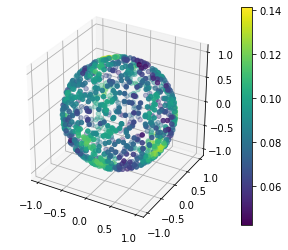

In [11]:
manifold.plot_3d(X, density_fromEuc)

### Estimate density from point cloud, passing estimated geodesic distances to the kernel function
This is what's done by default by the scalar curvature estimator

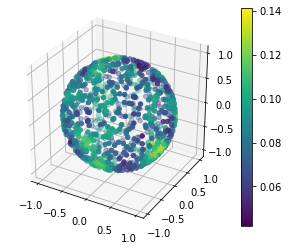

In [12]:
D = np.load("example_data/Rdist_1000.npy")
kde = curvature.KDE(2, D = D)
density_fromRdist = kde.density()

manifold.plot_3d(X, density_fromRdist)

Compare the two sets of density estimates

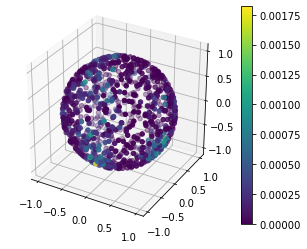

In [13]:
diff = [density_fromEuc[i] - density_fromRdist[i] for i in range(1000)]
manifold.plot_3d(X, diff)

### Estimate density using a different kernel (Gaussian)

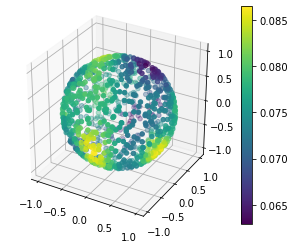

In [14]:
kde = curvature.KDE(2, D = D, kernel = curvature.KDE.gauss)
density_gauss = kde.density()
manifold.plot_3d(X, density_gauss)